주성분 분석 : PCA
  - 고차원의 데이터를 저차원으로 축소하면서 데이터의 주요 특징을 최대한 보존처리 하는 기법


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = np.load('/content/drive/MyDrive/data/fruits_300.npy')
data.shape

(300, 100, 100)

In [5]:
from sklearn.decomposition import PCA
# 3차원 데이터를 2차원으로 변경
data_2dim = data.reshape(300, -1)
data_2dim.shape

(300, 10000)

In [12]:
# 10000 차수를 50차수로 변경
pca = PCA(n_components=100)
data_pca =  pca.fit_transform(data_2dim)
data_pca.shape, pca.components_.shape

((300, 100), (100, 10000))

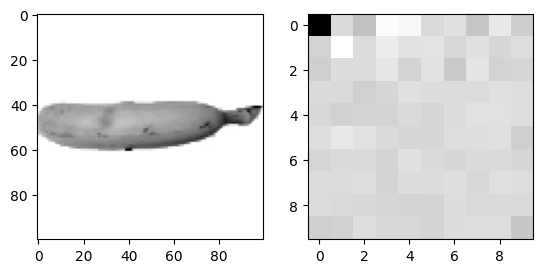

In [15]:
# 2차원데이터 원본 10000차수
# 2차원데이터를 주성분 분석으로 50차수로 조정 했을때 원본과 조정된 미지의 차이를 시각화
plt.subplot(1,2,1)
plt.imshow(data_2dim[200].reshape(100,100), cmap='gray_r')
plt.subplot(1,2,2)
plt.imshow(data_pca[200].reshape(10,10), cmap='gray_r')

LogisticRegression을 이용해서 분류 모델을개발

In [17]:
target = [0]*100 + [1]*100 + [2]*100

모델을 이용해서 예측하고 평가하는 작업대신에
  - 교차검즘을 이용해서 성능평가 미리 해 볼수 있음

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
logistic = LogisticRegression()
score = cross_validate(logistic, data_pca, target, cv=5)
score['test_score'].mean(), score['fit_time'].mean()

(1.0, 0.1257617950439453)

In [36]:
# 퍼센트로 PCA사용하기
pca = PCA(n_components=2)
data_pca =  pca.fit_transform(data_2dim)
print(data_pca.shape, pca.components_.shape)
logistic = LogisticRegression(max_iter=10000)
score = cross_validate(logistic, data_pca, target, cv=5)
score['test_score'].mean(), score['fit_time'].mean()

(300, 2) (2, 10000)


(0.9966666666666667, 0.0692718505859375)

In [38]:
# 주성분 분석으로 차원 축소한 데이터를 이용해서 군집을 분류해 봅시다
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init='auto')
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init='auto')

In [39]:
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [32]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

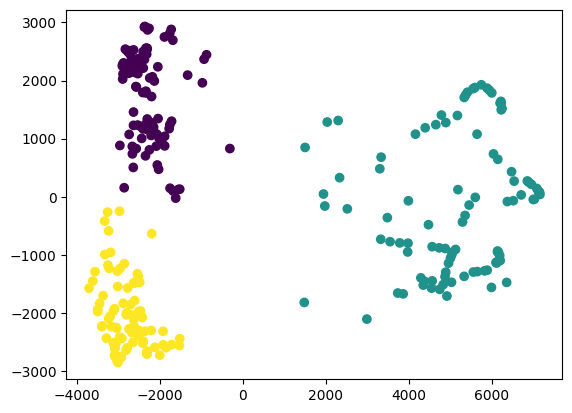

In [41]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=kmeans.labels_)
plt.show()

데이터를 임의로 생성해서 PCA 적용해 보기

(100, 2)


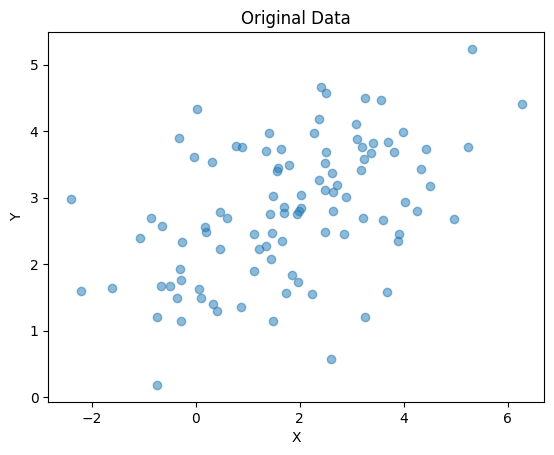

In [44]:
np.random.seed(123)
# 데이터 생성
mean = [2,3]
cov = [[3,1],[1,1]]  # 공분산 행렬
# 다변량 정규분포를 따르는 데이터 100개  생성
data = np.random.multivariate_normal(mean, cov, 100)
print(data.shape)
# 데이터 시각화
plt.scatter(data[:,0], data[:,1],alpha=0.5)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [48]:
# 주성분 1개만 추출
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data)
print(data_pca.shape)

(100, 1)


In [49]:
# 차원축소 -> 복원
data_inv = pca.inverse_transform(data_pca)
print(data_inv.shape)

(100, 2)


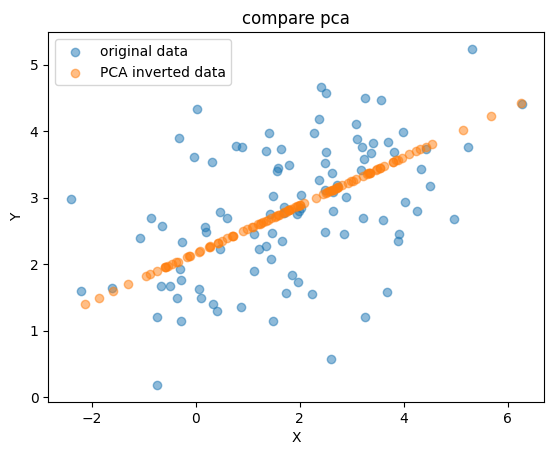

In [51]:
# 데이터 시각화
plt.scatter(data[:,0], data[:,1],alpha=0.5,label='original data')
plt.scatter(data_inv[:,0], data_inv[:,1],alpha=0.5,label='PCA inverted data')
plt.title('compare pca')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


모델 평가
  - 교차검증 모델

In [53]:
from sklearn import datasets, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [69]:
data = datasets.load_digits()
X = data.data
y = data.target

In [70]:
X.shape, y.shape

((1797, 64), (1797,))

In [71]:
ss = StandardScaler()
logistic = LogisticRegression()
X_scaled = ss.fit_transform(X)
logistic.fit(X_scaled, y)
logistic.predict(X_scaled)

array([0, 1, 2, ..., 8, 9, 8])

In [72]:
ss = StandardScaler()
logistic = LogisticRegression()
pipeline = make_pipeline(ss, logistic)
pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [73]:
pipeline.predict(X)

array([0, 1, 2, ..., 8, 9, 8])

In [74]:
# 숫자 데이터 로드
digits = datasets.load_digits()
# 특성행렬을 만든다
X = digits.data
# 타겟벡터를 만든다
y = digits.target
# 정규화
scaler = StandardScaler()
# 로지스틱 회귀
logistic = LogisticRegression()
# 파이프라인 생성  : 데이터를 표준화하고 그 데이터로 로지스틱회귀에 적용
pipeline = make_pipeline(scaler, logistic)
# k-폴드 교차 검증 생성
kfold = KFold(n_splits=5, random_state=1,shuffle=True)
# k폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             X,   # 원본 학습용 데이터
                             y,   # 정답
                             cv=kfold,  # 교차검증 기법
                             scoring='accuracy',  # 평가 지표
                             n_jobs=-1  # 모든 cpu 코어 사용
                             )

In [75]:
cv_results.mean()

0.9699520272361498

In [76]:
cv_results

array([0.98333333, 0.95277778, 0.98328691, 0.97214485, 0.95821727])

데이터에 대해서 적용가능한 모델들을 각각 교차 검증해서 가장 성능높은 모델을 선택

In [78]:
# 사용가능한 모델을 정의 - 분류형태의 머신러닝
from sklearn.neighbors import KNeighborsClassifier  # 최근접 이웃 분류
from sklearn.linear_model import LogisticRegression  # 로지스틱 함수를 이용한 분류
from sklearn.naive_bayes import GaussianNB   # 가우시안 알고리즘을 이용한 분류
from sklearn.svm import SVC   # 분류
from sklearn.tree import DecisionTreeClassifier  # tree 계열의 분류
from sklearn.ensemble import RandomForestClassifier # 앙상블
from sklearn.preprocessing import StandardScaler  # 정규화
from sklearn.pipeline import make_pipeline  # 자동화
from sklearn.model_selection import KFold, cross_val_score # 교차검증

In [79]:
# dictionary를 이용해서 다양한 모델을 정의
models = {
    'knn': KNeighborsClassifier(),
    'logistic': LogisticRegression(),
    'naive': GaussianNB(),
    'svm': SVC(),
    'tree': DecisionTreeClassifier(),
    'forest': RandomForestClassifier()
}

In [80]:
# 파이프라인을 통해 전처리 및 모델 학습/평가
pipelines = {}
for name, model in models.items():
  pipelines[name] = make_pipeline(StandardScaler(), model)

In [81]:
pipelines

{'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 'logistic': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'naive': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())]),
 'tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 'forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())])}

In [82]:
# 각각의 파이프라인에 대한 교차 검증 수행
results = {}
for name, pipeline in pipelines.items():
  kfold = KFold(n_splits=5, random_state=1,shuffle=True)
  cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)
  results[name] = cv_results.mean()
  print(f'{name} : {cv_results.mean()}')

knn : 0.97384246363355
logistic : 0.9699520272361498
naive : 0.7807458991024451
svm : 0.9810786134323738
tree : 0.8458480346641906
forest : 0.9749551222531723


In [84]:
sorted(results.items(), key=lambda x: x[1], reverse=True)

[('svm', 0.9810786134323738),
 ('forest', 0.9749551222531723),
 ('knn', 0.97384246363355),
 ('logistic', 0.9699520272361498),
 ('tree', 0.8458480346641906),
 ('naive', 0.7807458991024451)]

머신러닝 회귀모델의 비교해서 가장 성능이 우수한 모델 선택하기

In [85]:
# 회귀모델의 모든 종류를 평가해서 가장 성능이 우수한 모델 찾기
# 선형회귀 모델 로드하기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [94]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets


In [95]:
X.shape, y.shape

((17379, 13), (17379, 1))

In [97]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [98]:
X2 = X.iloc[:,1:]
X2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [99]:
# 각 모델을 dictionary형태로 만들고
models = {
    'linear': LinearRegression(),
    'knn': KNeighborsRegressor(),
    'tree': DecisionTreeRegressor(),
    'forest': RandomForestRegressor(),
    'svm': SVR()
}
# 각 모델별 파이프라인 리스트를 만들고
pipelines = {}
for name, model in models.items():
  pipelines[name] = make_pipeline(StandardScaler(), model)
# 각 파이프라인별 교차검증을 실행해서 결과를 리스트로 저장
results = {}
for name,pipeline in pipelines.items():
  kfold = KFold(n_splits=10,shuffle=True,random_state=100)
  cv_results = cross_val_score(pipeline, X2, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
  results[name] = cv_results.mean()

In [102]:
sorted(results.items(), key=lambda x: x[1], reverse=True)

[('forest', -1813.3388978123712),
 ('tree', -3476.9822420356913),
 ('knn', -11331.248054508487),
 ('svm', -19718.714365135187),
 ('linear', -20136.297486883297)]